# Modifying yields

This Notebook shows how to modify specific yields without having to re-generate yields table for every case. The modification will alter the input yields internally (within the code) and will leave the original yields table files intact.

To do so, the ``yield_modifier`` (developed by Tom Trueman) argument must be used, which consists of a list of arrays in the form of [ [``iso``, ``M``, ``Z``, ``type``, ``modifier``] , [...]]. This will modify the yield of a specific isotope for the given M and Z by multiplying the yield by a given factor (``type``="multiply") or replacing the yield by a new value (``type``="replace"). Modifier will be either the factor or value depending on type.

Notebook created by Benoit Côté

In [1]:
# Import Python modules
import matplotlib.pyplot as plt

#  Import NuPyCEE codes
from NuPyCEE import sygma

## Modifying the isotopic yields of a specific stellar model

In [2]:
# Select an isotope and a stellar model (the model needs to be in the yields table).
iso = "Si-28"
M = 15.0
Z = 0.02

# Run SYGMA with no yields modification.
s1 = sygma.sygma(iniZ=Z)

# Run SYGMA where the yield is multiplied by 2.
factor = 2.0
yield_modifier = [ [iso, M, Z, "multiply", factor] ]
s2 = sygma.sygma(iniZ=Z, yield_modifier=yield_modifier)

# Run SYGMA where the yield is replaced by 0.6.
value = 0.6
yield_modifier = [ [iso, M, Z, "replace", value] ]
s3 = sygma.sygma(iniZ=Z, yield_modifier=yield_modifier)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.05s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.05s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.06s


In [4]:
# Get the isotope array index.
i_iso = s1.history.isotopes.index(iso)

# Print the yield that was taken by SYGMA.
print(iso,"yield (original)      :  ", s1.get_interp_yields(M,Z)[i_iso],"Msun")
print(iso,"yield multiplied by",factor,":", s2.get_interp_yields(M,Z)[i_iso],"Msun")
print(iso,"yield replaced by",value,":  ", s3.get_interp_yields(M,Z)[i_iso],"Msun")

Si-28 yield (original)      :   0.14940000000000056 Msun
Si-28 yield multiplied by 2.0 : 0.298799999999999 Msun
Si-28 yield replaced by 0.6 :   0.5999999999999959 Msun


<IPython.core.display.Javascript object>


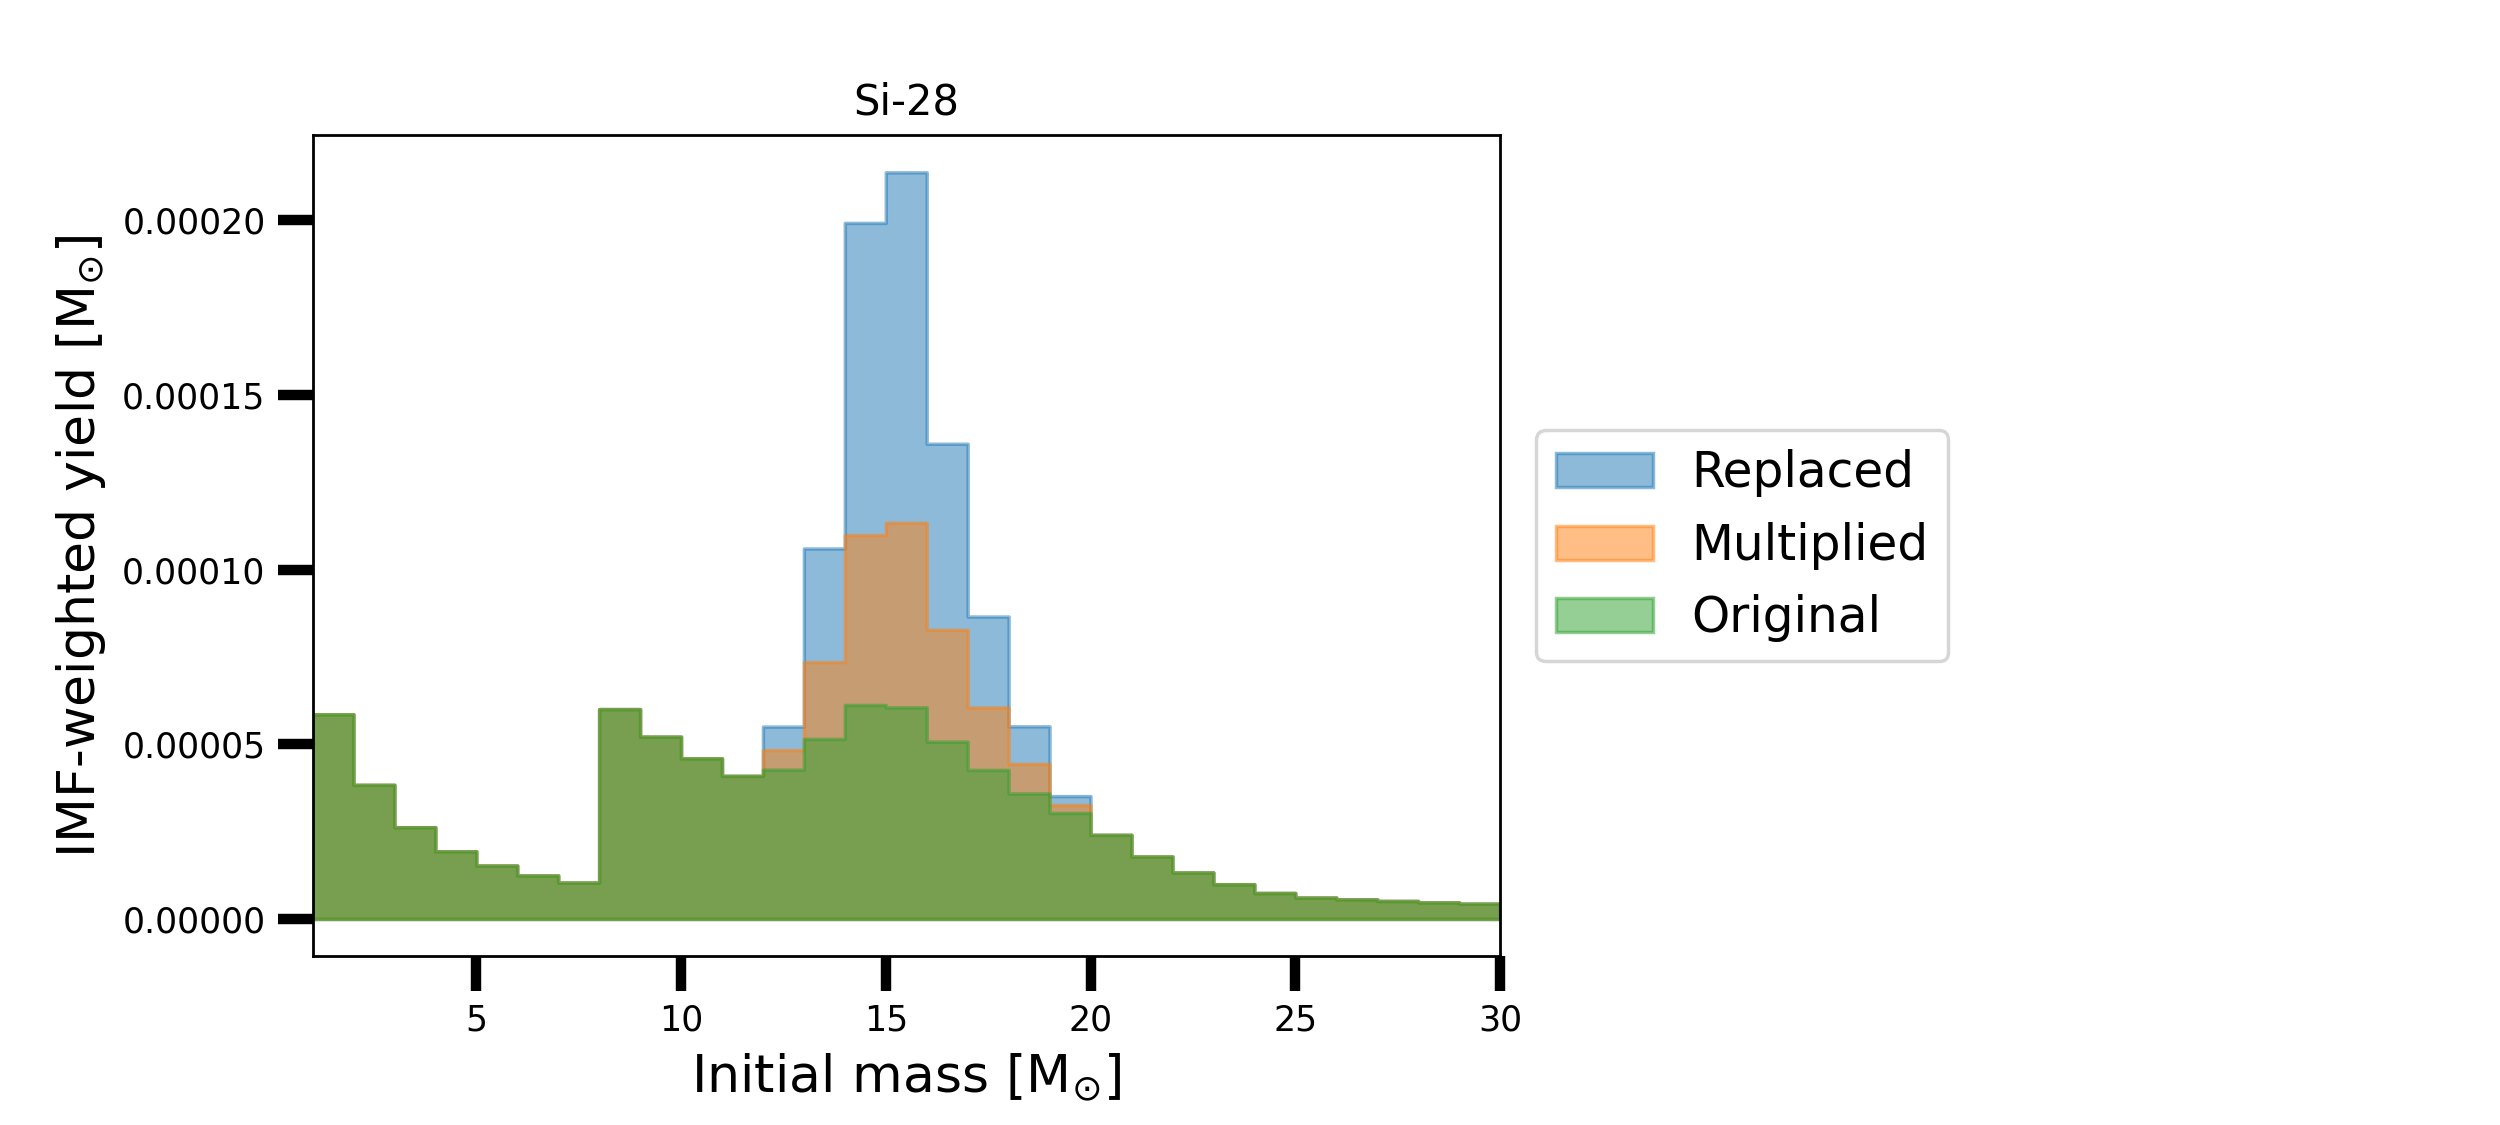

Text(0.5, 1.0, 'Si-28')

In [5]:
# Plot the yields as a function of stellar mass.
# Note: The y axis is not the yields as found in the yield table file.
#       It is the IMF-weighted yields from a 1Msun stellar population.
%matplotlib nbagg
s3.plot_mass_range_contributions(specie=iso, color="C0", label="Replaced")
s2.plot_mass_range_contributions(specie=iso, color="C1", label="Multiplied")
s1.plot_mass_range_contributions(specie=iso, color="C2", label="Original")
plt.title(iso,fontsize=12)

## Modifying the isotopic yields of several stellar models

In [6]:
# Select an isotope
iso = "Si-28"

# Define the list of multiplication factor for each stellar model
factor_list = [2, 4, 8, 16]
M_list = [12.0, 15.0, 20.0, 25.0]
Z = 0.02

# Fill the yield_modifier array
yield_modifier = []
for M, factor in zip(M_list, factor_list):
    yield_modifier.append([iso, M, Z, "multiply", factor])

# Run SYGMA with yields modification
s4 = sygma.sygma(iniZ=Z, yield_modifier=yield_modifier)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.06s


<IPython.core.display.Javascript object>


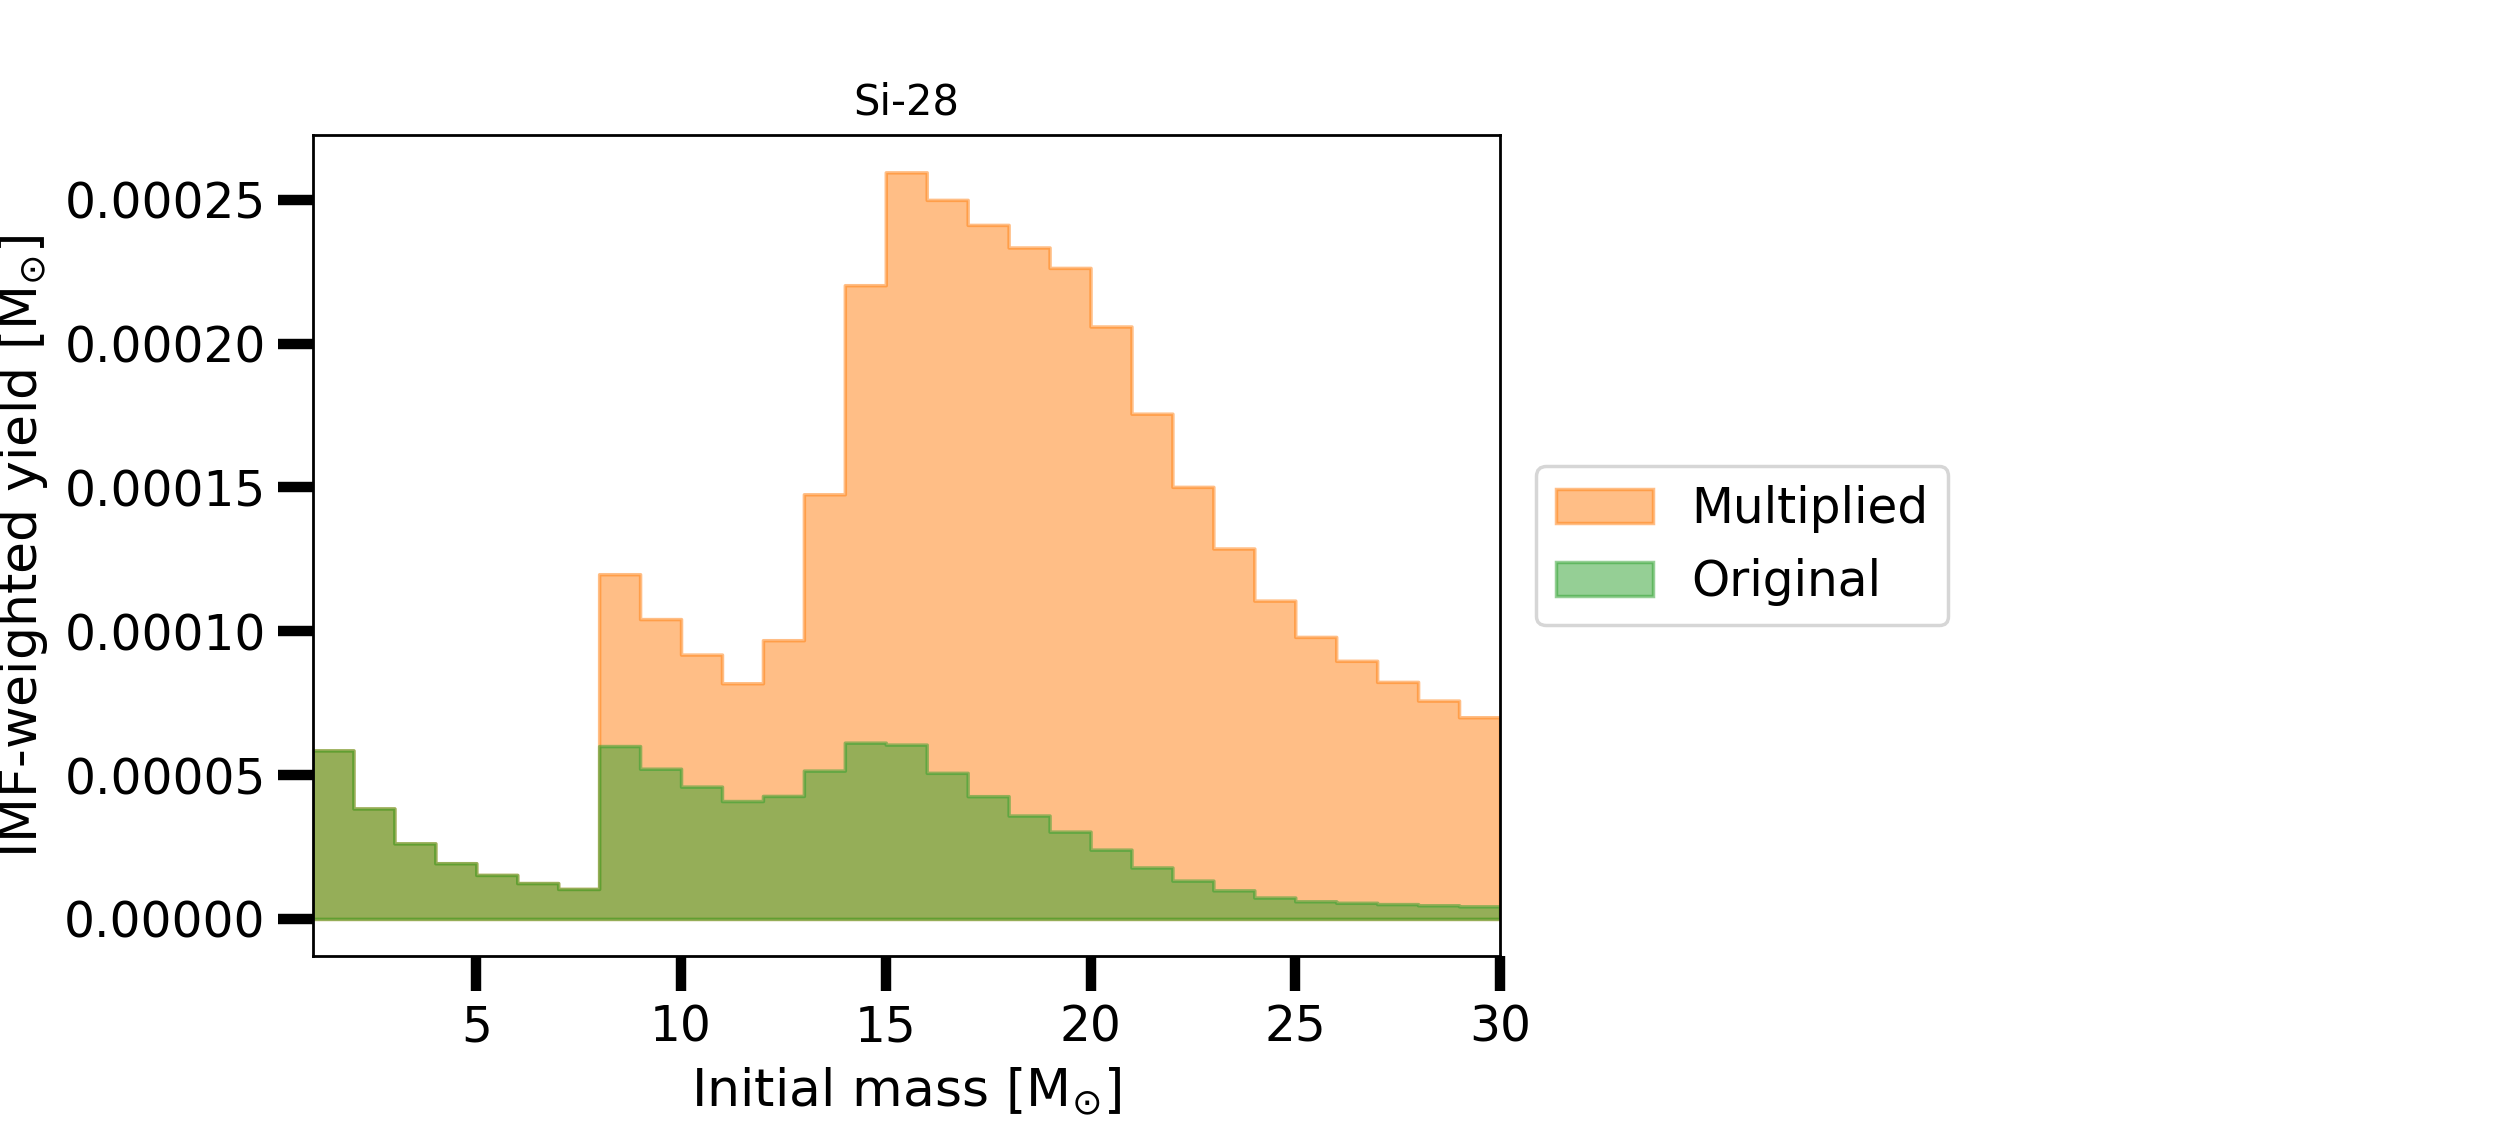

Text(0.5, 1.0, 'Si-28')

In [7]:
# Plot the yields as a function of stellar mass (IMF weighted yields for a 1Msun population)
%matplotlib nbagg
s4.plot_mass_range_contributions(specie=iso, color="C1", label="Multiplied")
s1.plot_mass_range_contributions(specie=iso, color="C2", label="Original")
plt.title(iso,fontsize=12)

## Example with OMEGA

In [8]:
# Import the NuPyCEE galactic chemical evolution code
from NuPyCEE import omega

In [9]:
# Print the list of available M and Z in the yields table
print("M:",s1.M_table)
print("Z:",s1.Z_table)

M: [1.0, 1.65, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 12.0, 15.0, 20.0, 25.0]
Z: [0.02, 0.01, 0.006, 0.001, 0.0001]


In [10]:
# Boost the Mg-24 yields of all massive stars by a factor of 2
iso = "Mg-24"
yield_modifier = []
for M in [12.0, 15.0, 20.0, 25.0]:
    for Z in [0.02, 0.01, 0.006, 0.001, 0.0001]:
        yield_modifier.append([iso,M,Z,"multiply",2])

# Run OMEGA with and without the yield modifier
o1 = omega.omega()
o2 = omega.omega(yield_modifier=yield_modifier)

OMEGA run in progress..
   OMEGA run completed - Run time: 0.36s
OMEGA run in progress..
   OMEGA run completed - Run time: 0.35s


<IPython.core.display.Javascript object>


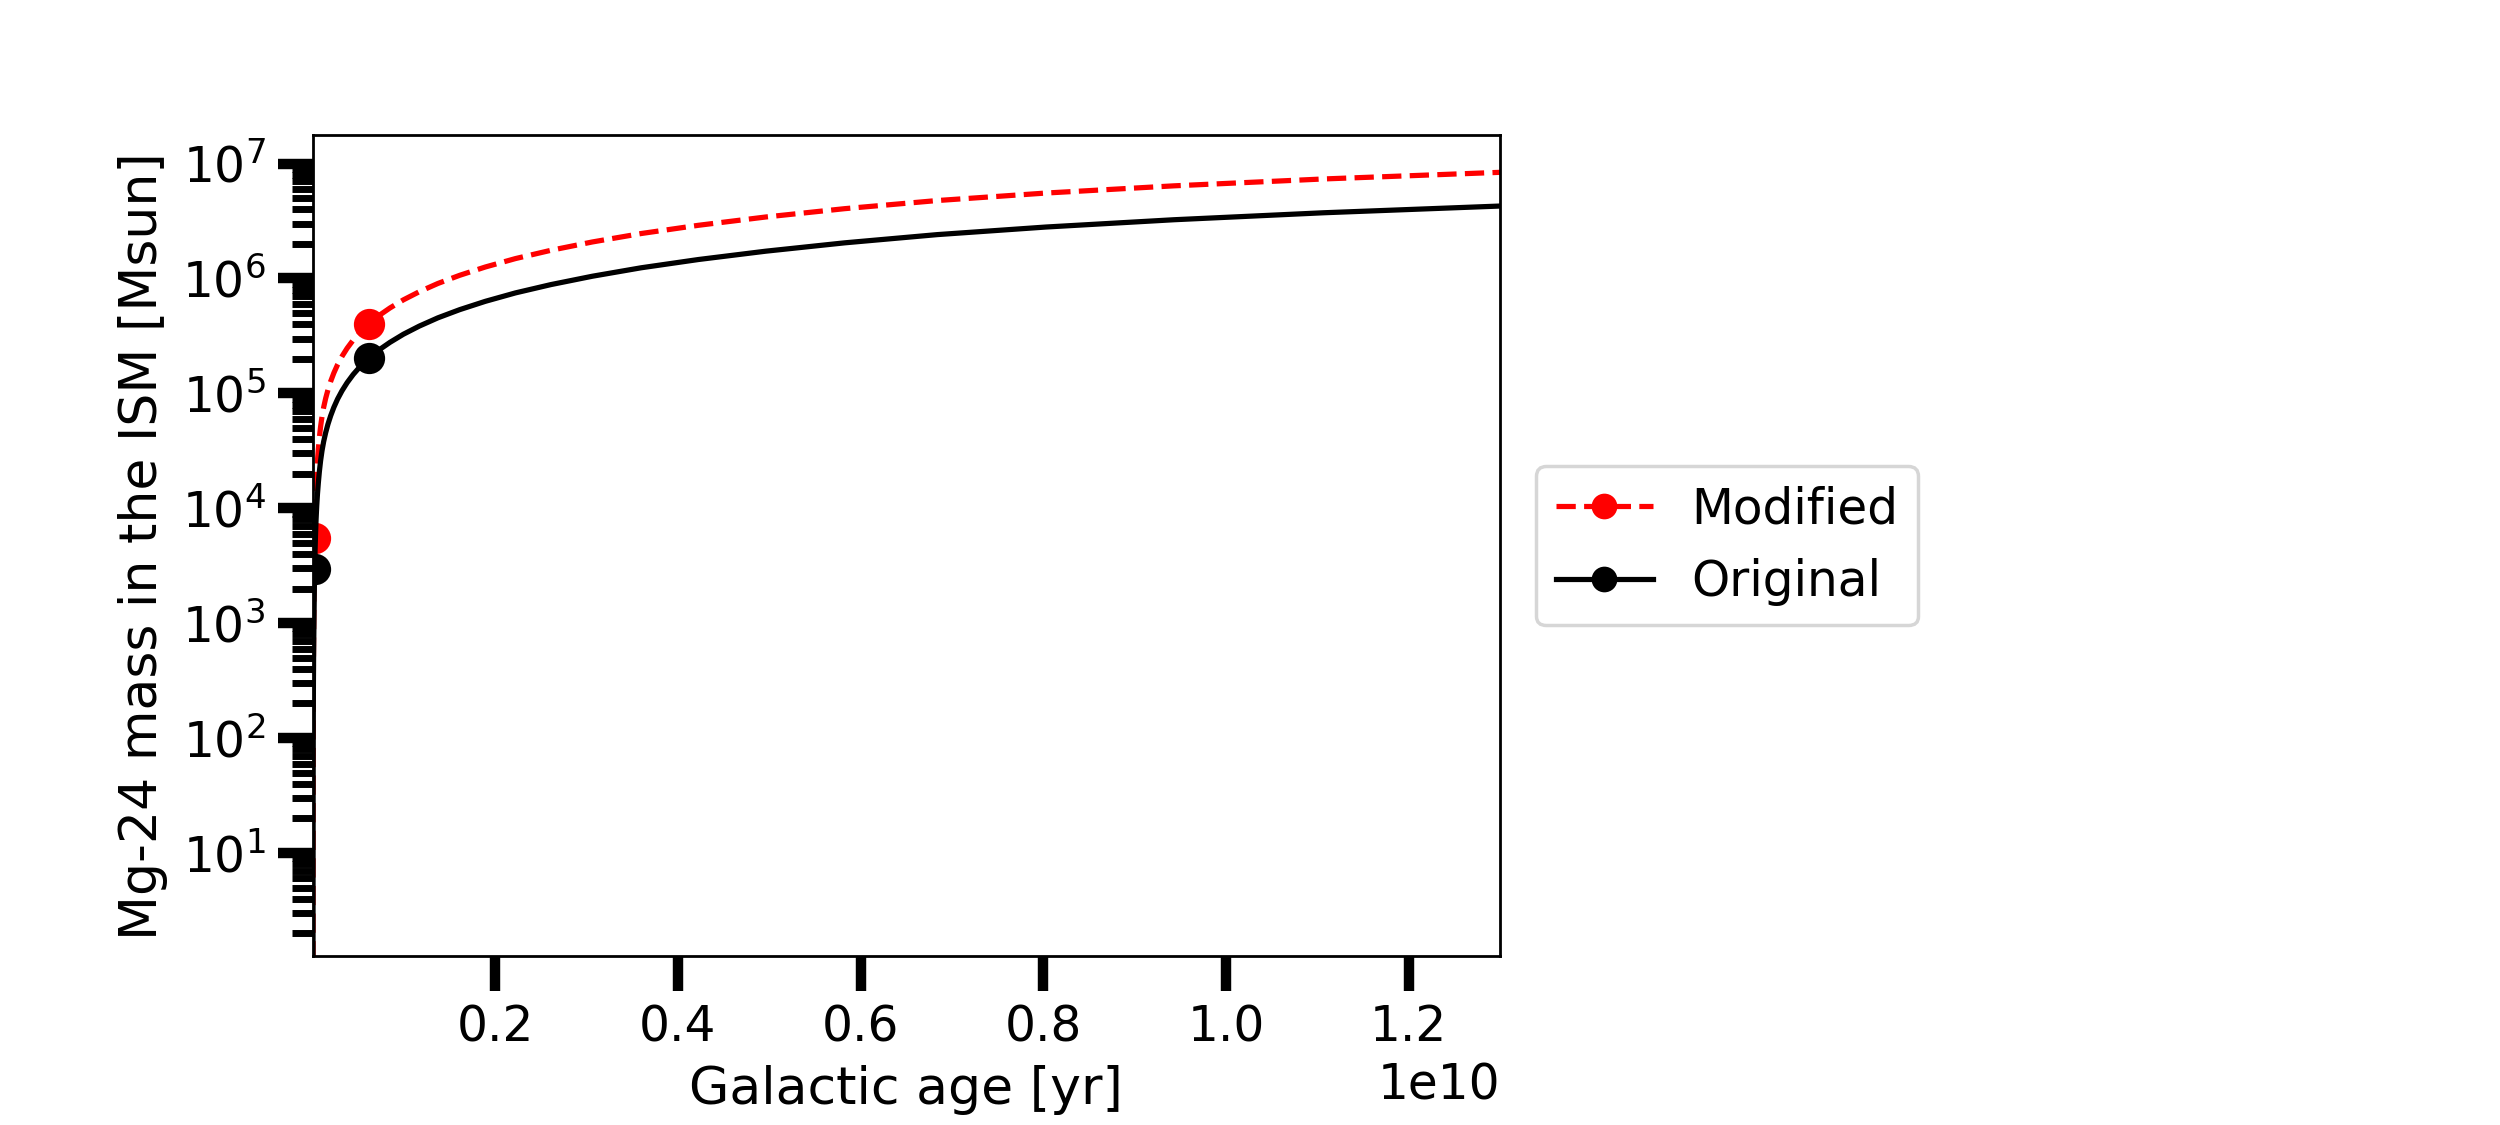

Text(0, 0.5, 'Mg-24 mass in the ISM [Msun]')

In [11]:
# Plot the amount of Mg-24 present in the interstellar medium of the galaxy
%matplotlib nbagg
o2.plot_mass(specie=iso, label="Modified", color="r", shape="--")
o1.plot_mass(specie=iso, label="Original")

# Set visual
plt.xscale("linear")
plt.xlabel("Galactic age [yr]")
plt.ylabel(iso+" mass in the ISM [Msun]")